# **Import Libraries**


Here we are going to experiment the simple linear regression using Medical cost dataset.I have taken this dataset from kaggle (https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download)

> Add blockquote



In [ ]:
# Import necessary dataset
import pandas as pd  # used to read the dataset in csv or excel
import numpy as np   # regresion use mathematical concept hence numpy helps in those task
import matplotlib.pyplot as plt # we will be plotting the model output in graph so, matplot lib helps in plotting

# **Upload the dataset**

In [ ]:
df = pd.read_csv("/content/Medical cost dataset.csv")

# **View the dataset**.

Here I have used two formats for viewing

1. df.head () helps in viewing the first few rows (default = 5)
2. df.sample () helps in viewing random rows in a dataset (we have already given 9, so 9 random rows are visible, this can be used if we have large dataset)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.sample(9)

,age,sex,bmi,children,smoker,region,charges
592,20,male,31.130,2,no,southeast,2566.47070
34,28,male,36.400,1,yes,southwest,51194.55914
854,49,female,23.845,3,yes,northeast,24106.91255
486,54,female,21.470,3,no,northwest,12475.35130
49,36,male,35.200,1,yes,southeast,38709.17600
162,54,male,39.600,1,no,southwest,10450.55200
881,23,male,27.360,1,no,northwest,2789.05740
199,64,female,39.330,0,no,northeast,14901.51670
1009,51,male,27.740,1,no,northeast,9957.72160


# **Explore the data**

In [ ]:
df. describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **Selecting features**

In [ ]:
features = df[['age', 'bmi', 'children','charges']]
features.sample(9)

,age,bmi,children,charges
891,36,29.040,4,7243.81360
263,19,36.955,0,36219.40545
91,53,24.795,1,10942.13205
690,21,27.360,0,2104.11340
1104,37,29.800,0,20420.60465
1180,42,41.325,1,7650.77375
838,35,23.465,2,6402.29135
560,46,19.950,2,9193.83850
979,36,29.920,0,4889.03680


# **Analysing through Histogram**

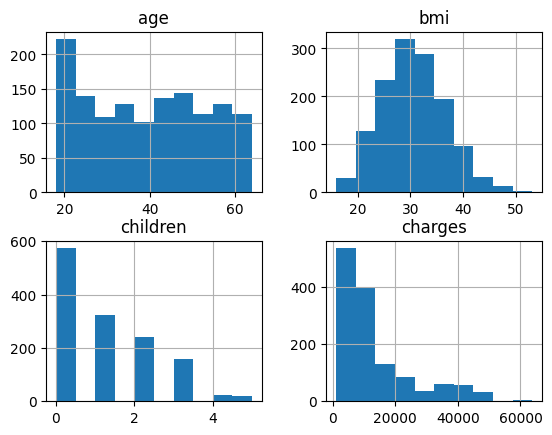

In [ ]:
viz = features[['age', 'bmi', 'children','charges']]
viz.hist()
plt.show()

In above histogram, you can see people age between 18 to 20 is higher and other age are spreaded out. And in BMI showing bell shaped distribution shows most people are obese/ overweight according to medical terms. Most people are either independent of children or having 1 to 2 children. 4 and above is very less. I feel BMI can be a ideal feature for charge prediction. But let's experiment with scatter plot to see the relationship.

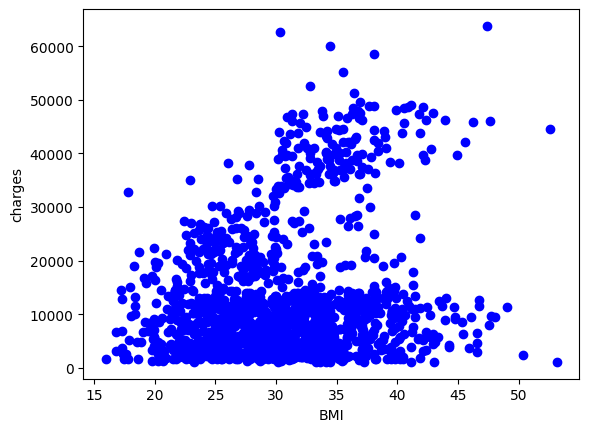

In [ ]:
# scatter plot between BMI and charges
plt.scatter(features.bmi, features.charges, color = 'blue')
plt.xlabel('BMI')
plt.ylabel('charges')
plt.show()


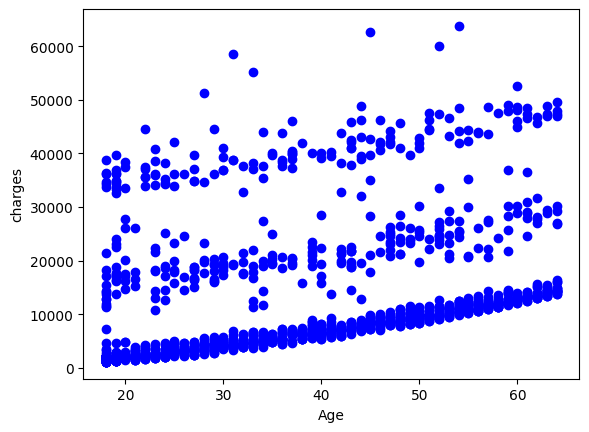

In [ ]:
# scatter plot between age and charges
plt.scatter(features.age, features.charges, color = 'blue')
plt.xlabel('Age')
plt.ylabel('charges')
plt.show()

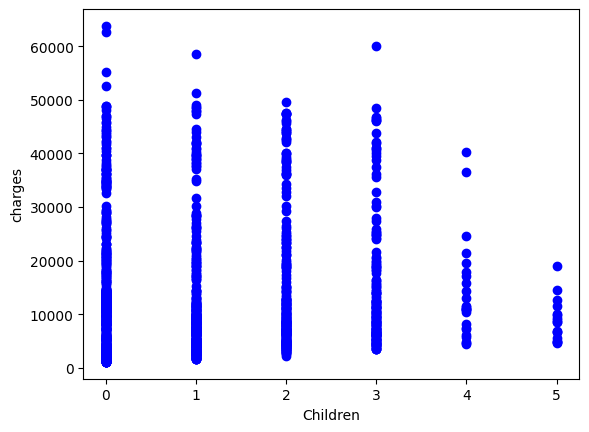

In [ ]:
#scatter plot between children and charges
plt.scatter(features.children, features.charges, color = 'blue')
plt.xlabel('Children')
plt.ylabel('charges')
plt.show()

Compared to three features, BMI is helpful in linear regression. Thought not all datapoints are linear enough but still some are helpful in linear prediction. If you see other 2 features they were no close to linear relationship with charges. Let's train BMI and charges.

# **Extracting input (dependent cariable) & label (Independent variable) from the dataset**

In [ ]:
X = features.bmi.to_numpy()
y = features.charges.to_numpy()

# **Create Train & Test Data set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
type(X_train), np.shape(X_train), np.shape(X_test)

(numpy.ndarray, (1070,), (268,))

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train.reshape(-1,1), y_train)

LinearRegression()

In [ ]:
# print the weights (coefficient) (w) and intercept(b0)     h(x) = b0 + wx
print("Coefficient:",model.coef_[0])
print("Intercept:",model.intercept_)
# The coeffiecint and intercept determines the best fit line for training data

Coefficient: 392.43654416987977
Intercept: 1353.0730722046683


# **Plotting the training dataset**

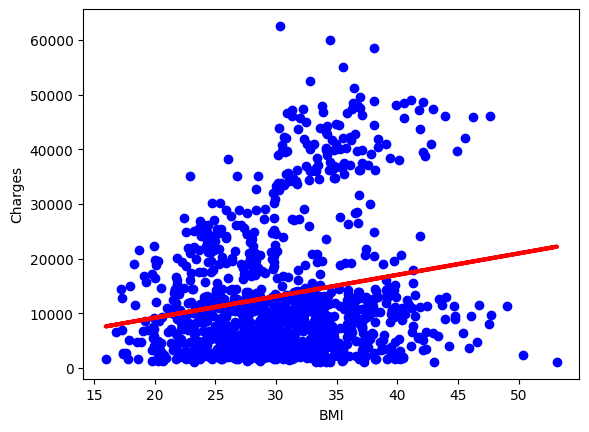

In [ ]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, model.predict(X_train.reshape(-1,1)), color='red', linewidth=3)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

# **Evaluation**

In [ ]:
# Evaluating Testing dataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the predict method to make test predictions
y_pred = model.predict(X_test.reshape(-1,1))

# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2-score: %.2f" % r2_score(y_test, y_pred))

Mean absolute error: 9784.65
Mean squared error: 149085057.04
Root mean squared error: 12210.04
R2-score: 0.04


In [ ]:
# Evaluating Training dataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the predict method to make test predictions
y_pred = model.predict(X_train.reshape(-1,1))

# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_train, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_train, y_pred)))
print("R2-score: %.2f" % r2_score(y_train, y_pred))

Mean absolute error: 9067.95
Mean squared error: 138714176.82
Root mean squared error: 11777.70
R2-score: 0.04


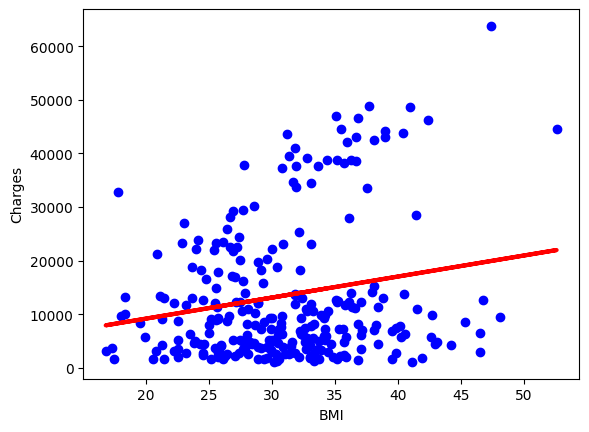

In [ ]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, model.predict(X_test.reshape(-1,1)), color='red', linewidth=3)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

From the above graph and evaluation parameter you can see the model doen not work good for simple linear regression.

1. You see the charges range from 10,000 to 60,000 so the MAE should be between 500 and 5000 for the best result but we got almost 9k which says the model worked poorly
2. Similarly MSE and RMSE should be smaller and it also turned out to be higher in range
3. R square should be atleast between 0.7 to 1 for a good prediction but it was almost 0 which shows the model worked poorly on simple liner regression.

From the graph I would say we can go for multiple linear regression to solve this.

But you can also try the evluation between age and charges to see how the model works.

Thank you!